In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from itertools import combinations

In [2]:
auto = pd.read_csv("Datasets\Auto.csv")

In [8]:
# a
auto = auto.dropna()
# create a binary variable mpg01 that contains a 1 if mpg contains a "high" value and a 0 if mpg contains a "low" value
median_mpg = auto["mpg"].median()
auto["mpg01"] = auto["mpg"].map(lambda x: 1 if x > median_mpg else 0)
# print(auto["mpg01"].to_numpy())


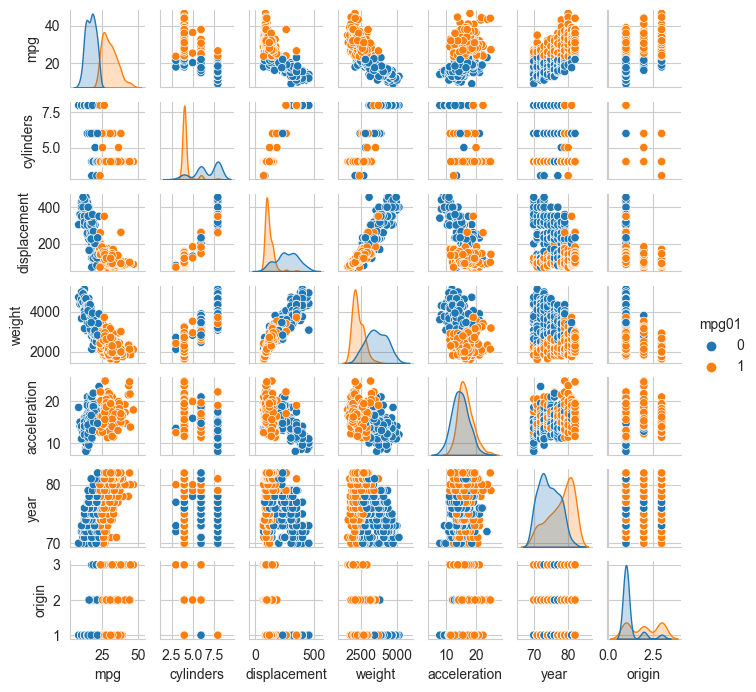

In [9]:
# b 
# create a scatterplot matrix which compares each variable to mpg01
sns.set_style("whitegrid")
sns.pairplot(auto, height=1, hue="mpg01")
plt.show()

In [30]:
# c
# split the data into a training set and a test set
from sklearn.model_selection import train_test_split
X = auto[['weight', 'displacement', 'acceleration', 'year', 'cylinders']]
y = auto["mpg01"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [31]:
# d
# fit LDA to the training set and compute the test error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("LDA test error : ", (y_test != y_pred).sum() / len(y_test))

LDA test error :  0.11557788944723618


In [32]:
# e
# fit QDA to the training set and compute the test error
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("QDA test error : ", (y_test != y_pred).sum() / len(y_test))

QDA test error :  0.11055276381909548


In [35]:
# f
# fit logistic regression to the training set and compute the test error
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression test error : ", (y_test != y_pred).sum() / len(y_test))

Logistic Regression test error :  0.12562814070351758


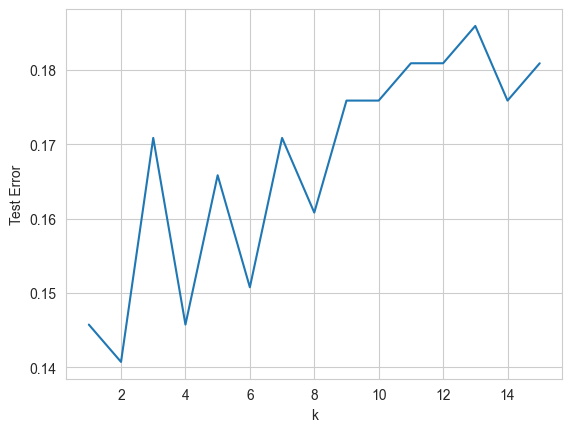

In [43]:
# g
# fit KNN to the training set and experiment with k values
from sklearn.neighbors import KNeighborsClassifier
test_error = []
for i in range(1, 16):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_error.append((y_test != y_pred).sum() / len(y_test))
plt.plot(range(1, 16), test_error)
plt.xlabel("k")
plt.ylabel("Test Error")
plt.show()